<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_Junho_2020/blob/master/Segmentacao_e_salva_TODAS_FotoS_v01_junho_19_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd

In [2]:
!pip install mahotas

In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020

import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [5]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [6]:
''''''
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='Fotos9Amostras720_e_varios_graos.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()


fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [7]:
#Construção da rede com as fotos já recortadas anteriormente
labels = [] #882 imagens recortadas por nós
images = [] #882 imagens lidas no formato de lista 
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    images.append(cv2.imread(f))
    labels.append(f)


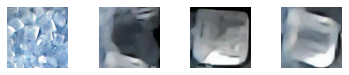

In [8]:
# Import the 'pyplot' module of 'matplotlib'
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see 
traffic_signs = [25, 30, 36, 40]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

In [9]:
# Import the 'transform' module from 'skimage'
from skimage import transform 

# Rescale the images in the 'images' array
images28 = [transform.resize(image, (28, 28)) for image in images]

In [10]:
# Import 'rgb2gray' from 'skimage.color'
from skimage.color import rgb2gray

# Convert 'images28' to an array
images28 = np.array(images28)

# Convert 'images28' to grayscale
images28 = rgb2gray(images28)

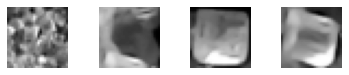

In [11]:
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [12]:
# Segmentation: start here......

In [13]:
# start top

In [14]:
#Start to use the big image
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [15]:
Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [16]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0]

In [17]:
print(img.shape)

(1200, 1200)


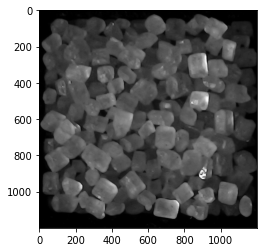

In [18]:
plt.imshow(img, cmap = "gray")

In [19]:
#First top

In [20]:
a=0
b=1200
c=100
d=200
Num=12
ww=[]
label=[]

for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
  ww.append(img_1st)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


In [21]:
#2nd top

In [22]:
Num=12
Size=28
img28_all=[]
for i in range(Num):
  data=np.array(ww[i])
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img28_all.append(img28)

img28_all=np.array(img28_all)
print(img28_all.shape)


(12, 28, 28)


In [23]:
#3th top

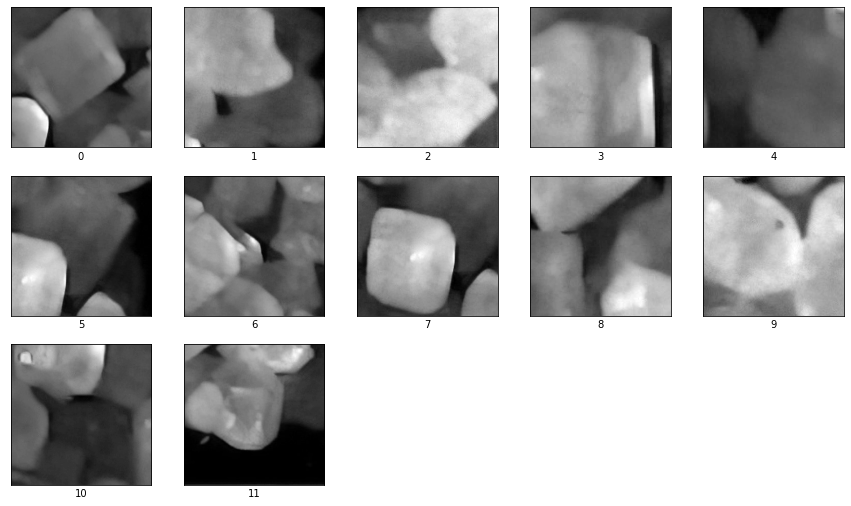

In [24]:

plt.figure(figsize=(15,15))
for i in range(Num):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(ww[i], cmap = "gray")
  plt.xlabel(i)

  

In [25]:
#4th top

In [26]:
Types_top=[]
plt.figure(figsize=(15,15))
for i in range(Num):
  print('i=',i,'=====')
  Valor=input('Tipo=')
  Types_top.append(Valor)

i= 0 =====
Tipo=I
i= 1 =====
Tipo=I
i= 2 =====
Tipo=I
i= 3 =====
Tipo=I
i= 4 =====
Tipo=I
i= 5 =====
Tipo=I
i= 6 =====
Tipo=I
i= 7 =====
Tipo=I
i= 8 =====
Tipo=I
i= 9 =====
Tipo=I
i= 10 =====
Tipo=I
i= 11 =====
Tipo=I


<Figure size 1080x1080 with 0 Axes>

In [27]:
# 5th top

In [28]:
Num=12
img28_ravel_all=[]
for i in range(Num):
  img28_ravel=np.copy(img28_all[i].ravel())
  img28_ravel_all.append(img28_ravel)
  # img28_ravel_all.append(img28_all[i].ravel())

In [29]:
# 6th top

In [30]:
img28_top=pd.DataFrame(img28_ravel_all)
img28_top.insert(0,"Type",Types_top,True)
print(img28_top)

   Type          0           1  ...         781         782         783
0     I  61.669838   64.168739  ...   81.513519   84.179695   87.702713
1     I  73.850189   73.203186  ...   17.816360    6.163011    0.582992
2     I   6.540858   11.085178  ...   27.324791   30.039474   29.887117
3     I  82.988174   79.542908  ...   14.207102   27.078405   44.960060
4     I  69.989647   69.794380  ...  103.153854  105.384628  104.637581
5     I  55.257900   49.955746  ...    8.832740    4.337033    1.990091
6     I  46.786446   46.528099  ...   55.158962   34.201916   27.528923
7     I  42.457314   47.137058  ...   79.302406   78.833237   77.483170
8     I  92.206039   90.503471  ...  104.977921  108.460899  106.539696
9     I  94.214241   97.487915  ...   82.169090   84.068680   85.411674
10    I  92.710777  133.746689  ...   83.956528   97.890358  103.621933
11    I  97.554474  103.659790  ...    5.964950    6.057570    6.136155

[12 rows x 785 columns]


In [31]:
# Start middle

In [32]:
#Start to use the big image
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0]

In [33]:
#First middle

In [34]:
a=0
b=1200
c=100
d=200
Num=12
ww=[]
label=[]

for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
  ww.append(img_1st)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


In [36]:
print([i+y,j+x])
print([x,y])
print([Size,Width])

[343, 725]
[597, 215]
[1200, 129]


In [37]:
print(np.array(img).shape)

(1200, 1200)


In [38]:
#2nd middle

In [39]:
Num=12
Size=28
img28_all=[]
for i in range(Num):
  data=np.array(ww[i])
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img28_all.append(img28)

img28_all=np.array(img28_all)
print(img28_all.shape)


(12, 28, 28)


In [40]:
#3th middle

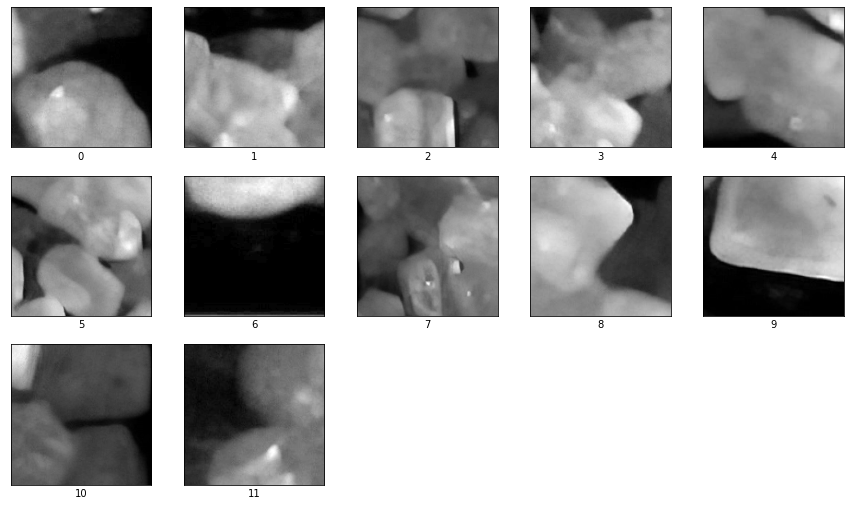

In [41]:

plt.figure(figsize=(15,15))
for i in range(Num):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(ww[i], cmap = "gray")
  plt.xlabel(i)

  

In [42]:
#4th middle

In [43]:
Types_middle=[]
plt.figure(figsize=(15,15))
for i in range(Num):
  print('i=',i,'=====')
  Valor=input('Tipo=')
  Types_middle.append(Valor)

i= 0 =====
Tipo=B
i= 1 =====
Tipo=B
i= 2 =====
Tipo=B
i= 3 =====
Tipo=B
i= 4 =====
Tipo=b
i= 5 =====
Tipo=B
i= 6 =====
Tipo=B
i= 7 =====
Tipo=B
i= 8 =====
Tipo=B
i= 9 =====
Tipo=B
i= 10 =====
Tipo=B
i= 11 =====
Tipo=B


<Figure size 1080x1080 with 0 Axes>

In [44]:
# 5th middle

In [45]:
Num=12
img28_ravel_all=[]
for i in range(Num):
  img28_ravel=np.copy(img28_all[i].ravel())
  img28_ravel_all.append(img28_ravel)
  # img28_ravel_all.append(img28_all[i].ravel())

In [46]:
# 6th middle

In [47]:
img28_middle=pd.DataFrame(img28_ravel_all)
img28_middle.insert(0,"Type",Types_middle,True)
#print(img28_middle)

In [48]:
# start bottom

In [49]:
#Start to use the big image
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0]

In [50]:
# First bottom

In [51]:
a=0
b=1200
c=100
d=200
Num=12
ww=[]
label=[]

for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
  ww.append(img_1st)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


In [52]:
# 2nd bottom

In [53]:
Num=12
Size=28
img28_all=[]
for i in range(Num):
  data=np.array(ww[i])
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img28_all.append(img28)

img28_all=np.array(img28_all)
print(img28_all.shape)


(12, 28, 28)


In [54]:
# 3th bottom

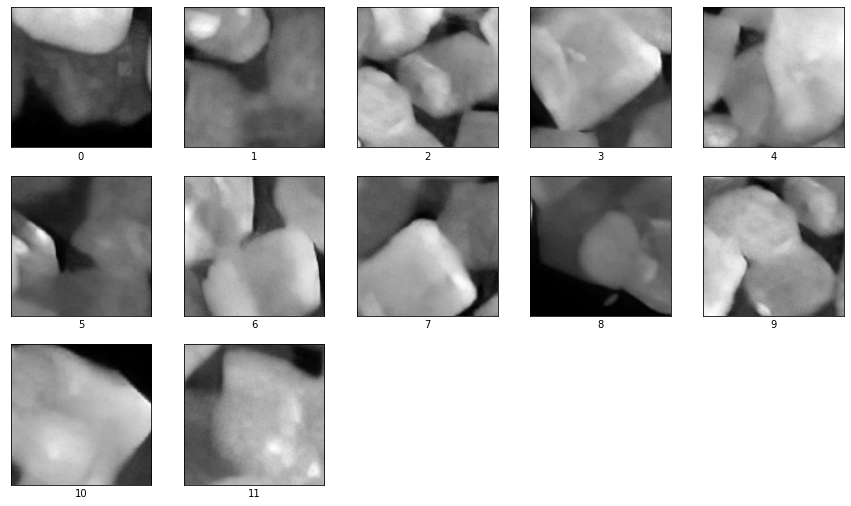

In [55]:

plt.figure(figsize=(15,15))
for i in range(Num):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(ww[i], cmap = "gray")
  plt.xlabel(i)

  

In [56]:
# 4th bottom

In [57]:
Types_bottom=[]
plt.figure(figsize=(15,15))
for i in range(Num):
  print('i=',i,'=====')
  Valor=input('Tipo=')
  Types_bottom.append(Valor)

i= 0 =====
Tipo=G
i= 1 =====
Tipo=G
i= 2 =====
Tipo=G
i= 3 =====
Tipo=G
i= 4 =====
Tipo=G
i= 5 =====
Tipo=G
i= 6 =====
Tipo=G
i= 7 =====
Tipo=G
i= 8 =====
Tipo=G
i= 9 =====
Tipo=G
i= 10 =====
Tipo=G
i= 11 =====
Tipo=G


<Figure size 1080x1080 with 0 Axes>

In [58]:
# 5th bottom

In [59]:
Num=12
img28_ravel_all=[]
for i in range(Num):
  img28_ravel=np.copy(img28_all[i].ravel())
  img28_ravel_all.append(img28_ravel)
  # img28_ravel_all.append(img28_all[i].ravel())

In [60]:
# 6th bottom

In [61]:
img28_bottom=pd.DataFrame(img28_ravel_all)
img28_bottom.insert(0,"Type",Types_bottom,True)
#print(img28_bottom)

In [68]:
frames = [img28_top,img28_middle,img28_bottom]
img28_all=pd.concat(frames)
print(img28_all)

   Type           0           1  ...         781         782         783
0     I   61.669838   64.168739  ...   81.513519   84.179695   87.702713
1     I   73.850189   73.203186  ...   17.816360    6.163011    0.582992
2     I    6.540858   11.085178  ...   27.324791   30.039474   29.887117
3     I   82.988174   79.542908  ...   14.207102   27.078405   44.960060
4     I   69.989647   69.794380  ...  103.153854  105.384628  104.637581
5     I   55.257900   49.955746  ...    8.832740    4.337033    1.990091
6     I   46.786446   46.528099  ...   55.158962   34.201916   27.528923
7     I   42.457314   47.137058  ...   79.302406   78.833237   77.483170
8     I   92.206039   90.503471  ...  104.977921  108.460899  106.539696
9     I   94.214241   97.487915  ...   82.169090   84.068680   85.411674
10    I   92.710777  133.746689  ...   83.956528   97.890358  103.621933
11    I   97.554474  103.659790  ...    5.964950    6.057570    6.136155
0     B   46.119114   29.742382  ...   48.750690   

In [69]:
# found drive
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [70]:
img28_all.to_csv('img28_all.csv',float_format="%.5f")
# save in drive
!cp img28_all.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/

In [71]:
img28_all=img28_all.drop(['Type'], axis = 1) 
print(img28_all)

           0           1           2    ...         781         782         783
0    61.669838   64.168739   67.230827  ...   81.513519   84.179695   87.702713
1    73.850189   73.203186   73.386971  ...   17.816360    6.163011    0.582992
2     6.540858   11.085178   17.038780  ...   27.324791   30.039474   29.887117
3    82.988174   79.542908   74.554733  ...   14.207102   27.078405   44.960060
4    69.989647   69.794380   68.948227  ...  103.153854  105.384628  104.637581
5    55.257900   49.955746   50.586742  ...    8.832740    4.337033    1.990091
6    46.786446   46.528099   46.009949  ...   55.158962   34.201916   27.528923
7    42.457314   47.137058   56.253735  ...   79.302406   78.833237   77.483170
8    92.206039   90.503471   90.805077  ...  104.977921  108.460899  106.539696
9    94.214241   97.487915   99.243637  ...   82.169090   84.068680   85.411674
10   92.710777  133.746689  135.867676  ...   83.956528   97.890358  103.621933
11   97.554474  103.659790  107.170753  

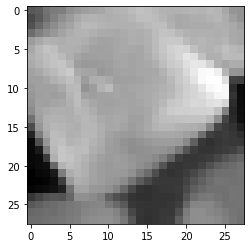

In [73]:
#img28_recovery=np.zeros((28,28))
Foto=np.array(img28_all.iloc[27]).reshape(28,28)
plt.imshow(Foto, cmap = "gray")